In [83]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import matplotlib
matplotlib.rcParams["figure.figsize"] = (20,10)

In [26]:
df = pd.read_csv('Bengaluru_House_Data.csv')
df

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00
...,...,...,...,...,...,...,...,...,...
13315,Built-up Area,Ready To Move,Whitefield,5 Bedroom,ArsiaEx,3453,4.0,0.0,231.00
13316,Super built-up Area,Ready To Move,Richards Town,4 BHK,NaN,3600,5.0,NaN,400.00
13317,Built-up Area,Ready To Move,Raja Rajeshwari Nagar,2 BHK,Mahla T,1141,2.0,1.0,60.00
13318,Super built-up Area,18-Jun,Padmanabhanagar,4 BHK,SollyCl,4689,4.0,1.0,488.00


In [27]:
df.shape

(13320, 9)

In [28]:
df.groupby('area_type')['area_type'].aggregate('count')

area_type
Built-up  Area          2418
Carpet  Area              87
Plot  Area              2025
Super built-up  Area    8790
Name: area_type, dtype: int64

In [29]:
#dropping availability, society, balcony
df1 = df.drop(['availability', 'society', 'balcony', 'area_type'], axis = 'columns')
df1.head()

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00


In [30]:
df1.isnull().sum() #cleaning

location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64

In [31]:
bath_median = df1['bath'].median() 
bath_median

2.0

In [32]:
df2 = df1.copy()
df2['bath'] = df1['bath'].fillna(bath_median)
df2

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00
...,...,...,...,...,...
13315,Whitefield,5 Bedroom,3453,4.0,231.00
13316,Richards Town,4 BHK,3600,5.0,400.00
13317,Raja Rajeshwari Nagar,2 BHK,1141,2.0,60.00
13318,Padmanabhanagar,4 BHK,4689,4.0,488.00


In [33]:
df2 = df2.dropna()  # dropping the remaining null values 
df2.isnull().sum()

location      0
size          0
total_sqft    0
bath          0
price         0
dtype: int64

In [34]:
df2['size'].unique()  # got redundant values

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [35]:
#using the lambda function tokenizing the values of 'size';
df3 = df2.copy()
df3['bhk'] = df2['size'].apply(lambda x : int(x.split(' ')[0]))  #x  : each row ofsize col , spilting the value by " " and returning the first character 

In [36]:
df3.head()
df3['bhk'].unique()

array([ 2,  4,  3,  6,  1,  8,  7,  5, 11,  9, 27, 10, 19, 16, 43, 14, 12,
       13, 18], dtype=int64)

In [37]:
df3['total_sqft'].unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [38]:
# handling the values in range
#checking if the values are float
from operator import truediv


def is_float(x):
    try:
        float(x)
    except:
        return False
    return True



In [39]:
df3[~df3['total_sqft'].apply(is_float)] # by negating the statement it will return the values which aren't float
# this is the non-uniform data 


,location,size,total_sqft,bath,price,bhk
30,Yelahanka,4 BHK,2100 - 2850,4.0,186.000,4
56,Devanahalli,4 Bedroom,3010 - 3410,2.0,192.000,4
81,Hennur Road,4 Bedroom,2957 - 3450,2.0,224.500,4
122,Hebbal,4 BHK,3067 - 8156,4.0,477.000,4
137,8th Phase JP Nagar,2 BHK,1042 - 1105,2.0,54.005,2
...,...,...,...,...,...,...
12990,Talaghattapura,3 BHK,1804 - 2273,3.0,122.000,3
13059,Harlur,2 BHK,1200 - 1470,2.0,72.760,2
13240,Devanahalli,1 BHK,1020 - 1130,2.0,52.570,1
13265,Hoodi,2 BHK,1133 - 1384,2.0,59.135,2


In [40]:
#converting the ranges into float values
def convt_range_to_float(x):
    token = x.split('-')
    if len(token) == 2:
        return((float(token[0]) + float(token[1]))/2)
    try:
        return float(x)
    except:
        return None


In [41]:
df4 = df3.copy()
df4['total_sqft'] = df['total_sqft'].apply(convt_range_to_float)
df4['total_sqft'].loc[30]

2475.0

In [42]:
#bath column : covt float to int
df4['bath']= df4['bath'].apply(lambda x : int(x))
df4.head()

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056.0,2,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600.0,5,120.00,4
2,Uttarahalli,3 BHK,1440.0,2,62.00,3
3,Lingadheeranahalli,3 BHK,1521.0,3,95.00,3
4,Kothanur,2 BHK,1200.0,2,51.00,2


In [43]:
#feature engineering :  creating new column price per sqft
#analysing location col

df5 = df4.copy()
df5['price_per_Sqft'] = df5['price'] * 100000 / df5['total_sqft']
df5.head()

,location,size,total_sqft,bath,price,bhk,price_per_Sqft
0,Electronic City Phase II,2 BHK,1056.0,2,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2,51.00,2,4250.000000


In [44]:
df5.location.unique()

array(['Electronic City Phase II', 'Chikka Tirupathi', 'Uttarahalli', ...,
       '12th cross srinivas nagar banshankari 3rd stage',
       'Havanur extension', 'Abshot Layout'], dtype=object)

In [45]:
loc_stats = df5.groupby('location')['location'].agg('count').sort_values(ascending=False)
loc_stats

location
Whitefield             539
Sarjapur  Road         397
Electronic City        302
Kanakpura Road         273
Thanisandra            234
                      ... 
 Banaswadi               1
Kanakadasa Layout        1
Kanakapur main road      1
Kanakapura  Rod          1
whitefiled               1
Name: location, Length: 1304, dtype: int64

In [46]:
len(loc_stats)
loc_less_than_10 = loc_stats[loc_stats <= 10]
loc_less_than_10

location
Dodsworth Layout         10
1st Block Koramangala    10
Nagappa Reddy Layout     10
Ganga Nagar              10
Dairy Circle             10
                         ..
 Banaswadi                1
Kanakadasa Layout         1
Kanakapur main road       1
Kanakapura  Rod           1
whitefiled                1
Name: location, Length: 1063, dtype: int64

In [47]:
df5.location = df5.location.apply(lambda x : 'other' if x in loc_less_than_10 else x )
df5.groupby('location')['location'].agg('count')

location
 Devarachikkanahalli           14
1st Block Jayanagar            14
1st Phase JP Nagar             25
2nd Phase Judicial Layout      11
2nd Stage Nagarbhavi           24
                             ... 
Yelahanka                     212
Yelahanka New Town             41
Yelenahalli                    13
Yeshwanthpur                   85
other                        2897
Name: location, Length: 242, dtype: int64

In [48]:
len(df5.location.unique())
df5

,location,size,total_sqft,bath,price,bhk,price_per_Sqft
0,Electronic City Phase II,2 BHK,1056.0,2,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2,51.00,2,4250.000000
...,...,...,...,...,...,...,...
13315,Whitefield,5 Bedroom,3453.0,4,231.00,5,6689.834926
13316,other,4 BHK,3600.0,5,400.00,4,11111.111111
13317,Raja Rajeshwari Nagar,2 BHK,1141.0,2,60.00,2,5258.545136
13318,Padmanabhanagar,4 BHK,4689.0,4,488.00,4,10407.336319


In [51]:
df5.head()
df5.shape

(13303, 7)

In [52]:
#outlier detection 
#1. Ideal bedroom size = 300 sqft , removing sizes less than 300 sqft
df5[df5.total_sqft/df5.bhk < 300].head() 

,location,size,total_sqft,bath,price,bhk,price_per_Sqft
9,other,6 Bedroom,1020.0,6,370.0,6,36274.509804
45,HSR Layout,8 Bedroom,600.0,9,200.0,8,33333.333333
58,Murugeshpalya,6 Bedroom,1407.0,4,150.0,6,10660.980810
68,other,8 Bedroom,1350.0,7,85.0,8,6296.296296
70,other,3 Bedroom,500.0,3,100.0,3,20000.000000


In [54]:
df6 = df5[~(df5.total_sqft/df5.bhk < 300)]
df6.shape

(12559, 7)

In [55]:
#checking priceper sqft if itshigh or low
df6.price_per_Sqft.describe()

count     12513.000000
mean       6307.441644
std        4160.931610
min         267.829813
25%        4210.526316
50%        5295.007564
75%        6916.666667
max      176470.588235
Name: price_per_Sqft, dtype: float64

In [80]:
#min  = 267 per sqt which is not acceptable
def remove_outliers_pps(df):
    df_out = pd.DataFrame()
    for k, subdf in df.groupby('location'):
        m = np.mean(subdf.price_per_Sqft)
        st = np.std(subdf.price_per_Sqft)
        reduced_df = subdf[(subdf.price_per_Sqft>(m-st)) & (subdf.price_per_Sqft<=(m+st))]
        df_out = pd.concat([df_out,reduced_df],ignore_index= True)
    return df_out


df7 = remove_outliers_pps(df6)
df7.shape


(10289, 7)

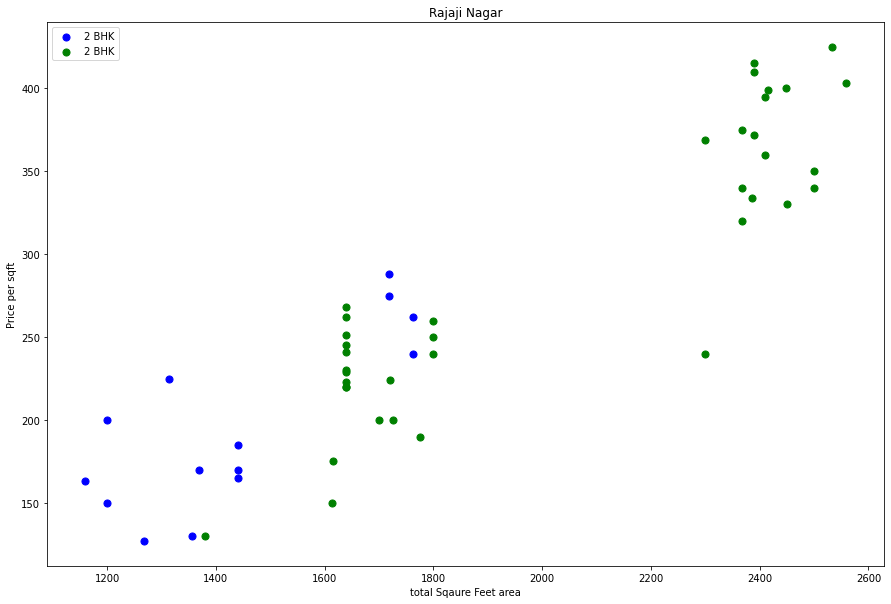

In [87]:
#checking appt prices on basis of bedrooms and size of appt
def plot_scatter(df, location):
    bhk2 = df[(df.location == location) & (df.bhk == 2)]
    bhk3 = df[(df.location == location) & (df.bhk == 3)]
    matplotlib.rcParams['figure.figsize'] = (15, 10)
    plt.scatter(bhk2.total_sqft, bhk2.price, color = 'blue', label = '2 BHK', s =50)
    plt.scatter(bhk3.total_sqft, bhk3.price, color = 'green', label = '2 BHK', s =50)
    plt.xlabel("total Sqaure Feet area")
    plt.ylabel("Price per sqft")
    plt.title(location)
    plt.legend()
    
plot_scatter(df7,'Rajaji Nagar')

In [148]:
def remove_bhk_outliers(df):
    exclude_indices = np.array([])
    for location, location_df in df.groupby('location'):
        bhk_stats = {}
        for bhk, bhk_df in location_df.groupby('bhk'):
            bhk_stats[bhk] = {
                'mean': np.mean(bhk_df.price_per_Sqft),
                'std': np.std(bhk_df.price_per_Sqft),
                'count': bhk_df.shape[0]
            }
        for bhk, bhk_df in location_df.groupby('bhk'):
            stats = bhk_stats.get(bhk-1)
            if stats and stats['count']>5:
                exclude_indices = np.append(exclude_indices, bhk_df[bhk_df.price_per_Sqft<(stats['mean'])].index.values)
    return df.drop(exclude_indices,axis='index')
df8 = remove_bhk_outliers(df7)
# df8 = df7.copy()
df8.shape

(7365, 7)

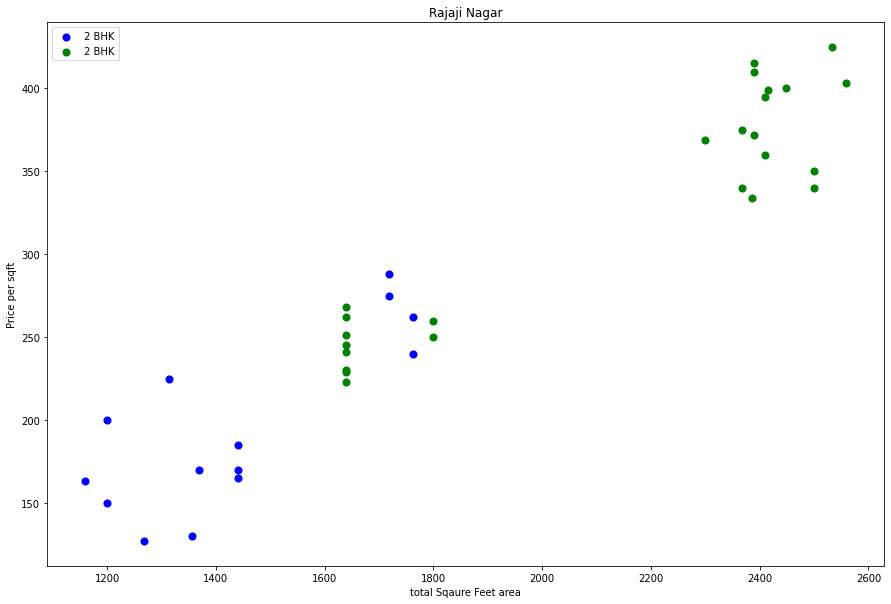

In [149]:
plot_scatter(df8,"Rajaji Nagar")


Text(0, 0.5, 'Count')

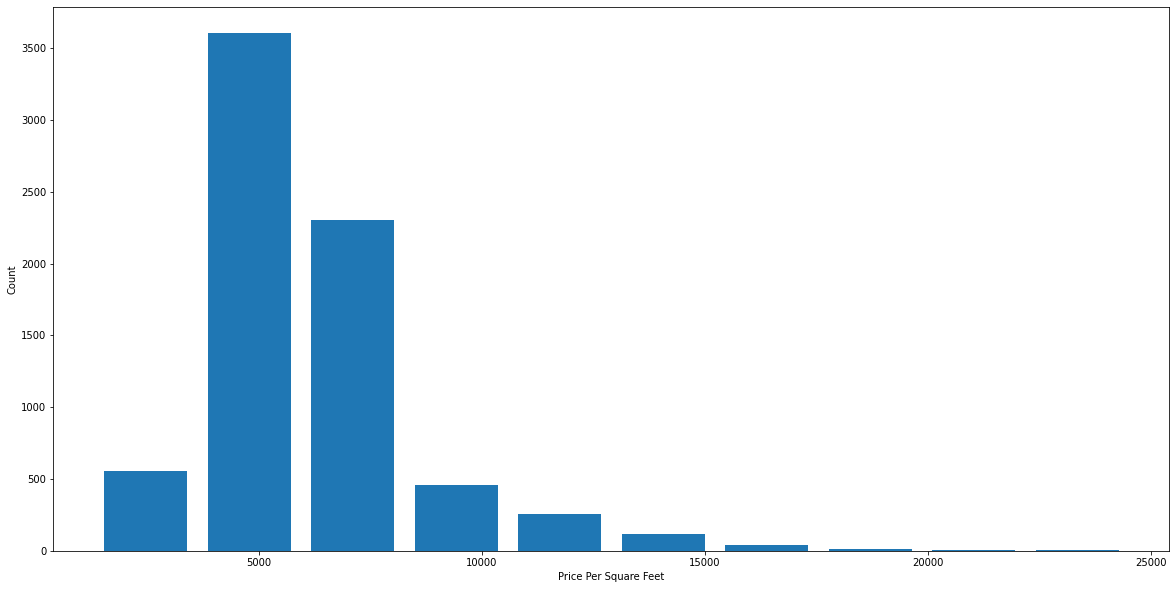

In [150]:
import matplotlib
matplotlib.rcParams["figure.figsize"] = (20,10)
plt.hist(df8.price_per_Sqft,rwidth=0.8)
plt.xlabel("Price Per Square Feet")
plt.ylabel("Count")

In [151]:
df8.bath.unique()

array([ 2,  3,  4,  5,  8,  1,  6,  7,  9, 12, 16, 13], dtype=int64)

Text(0, 0.5, 'Count')

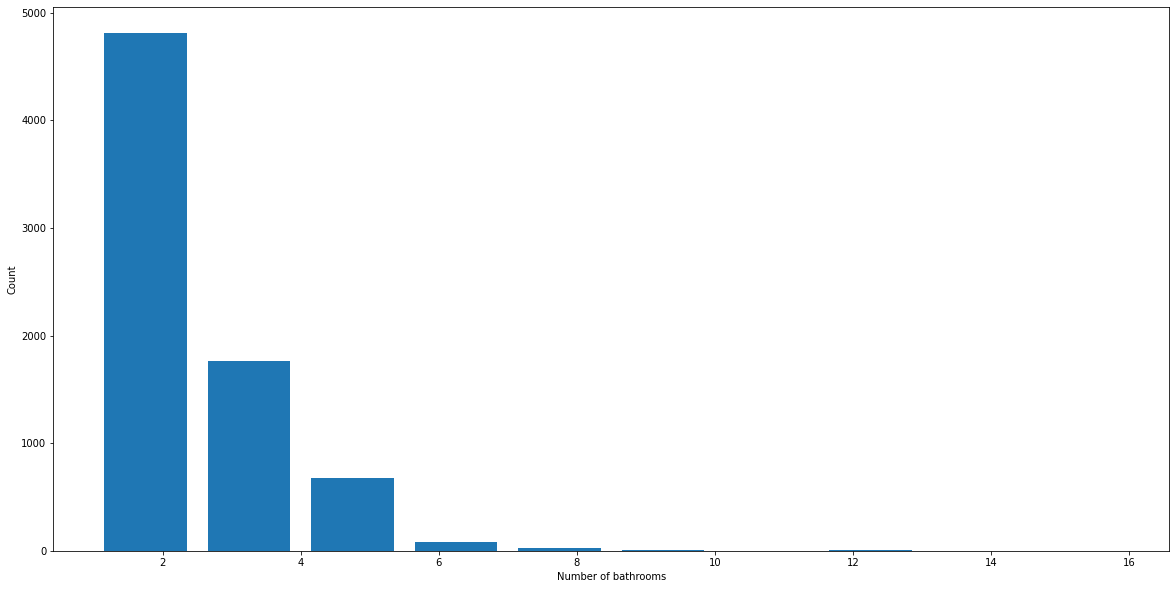

In [152]:
plt.hist(df8.bath,rwidth=0.8)
plt.xlabel("Number of bathrooms")
plt.ylabel("Count")

In [164]:
df8[df8.bath>10]
df8.shape

(7365, 7)

In [165]:
df8[df8.bath>df8.bhk+2]

,location,size,total_sqft,bath,price,bhk,price_per_Sqft
1645,Chikkabanavar,4 Bedroom,2460.0,7,80.0,4,3252.032520
5261,Nagasandra,4 Bedroom,7000.0,8,450.0,4,6428.571429
6739,Thanisandra,3 BHK,1806.0,6,116.0,3,6423.034330
8449,other,6 BHK,11338.0,9,1000.0,6,8819.897689


In [166]:
df8[df8.bath<df8.bhk+2]

,location,size,total_sqft,bath,price,bhk,price_per_Sqft
1,Devarachikkanahalli,2 BHK,1250.0,2,40.0,2,3200.000000
2,Devarachikkanahalli,2 Bedroom,1200.0,2,83.0,2,6916.666667
3,Devarachikkanahalli,2 BHK,1170.0,2,40.0,2,3418.803419
4,Devarachikkanahalli,3 BHK,1425.0,2,65.0,3,4561.403509
5,Devarachikkanahalli,2 BHK,947.0,2,43.0,2,4540.654699
...,...,...,...,...,...,...,...
10280,other,2 BHK,1200.0,2,70.0,2,5833.333333
10281,other,1 BHK,1800.0,1,200.0,1,11111.111111
10284,other,2 BHK,1353.0,2,110.0,2,8130.081301
10285,other,1 Bedroom,812.0,1,26.0,1,3201.970443


In [168]:
df9 = df8[df8.bath<df8.bhk+2]
df9.shape

(7287, 7)

In [169]:
df10 = df9.drop(['size','price_per_Sqft'],axis='columns')
df10.head(3)

,location,total_sqft,bath,price,bhk
1,Devarachikkanahalli,1250.0,2,40.0,2
2,Devarachikkanahalli,1200.0,2,83.0,2
3,Devarachikkanahalli,1170.0,2,40.0,2


In [170]:
#one hot encoding
dummies = pd.get_dummies(df10.location)
dummies.head(4)

,Devarachikkanahalli,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [171]:
df11 = pd.concat([df10,dummies.drop('other',axis='columns')],axis='columns')
df11.head()

,location,total_sqft,bath,price,bhk,Devarachikkanahalli,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
1,Devarachikkanahalli,1250.0,2,40.0,2,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Devarachikkanahalli,1200.0,2,83.0,2,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Devarachikkanahalli,1170.0,2,40.0,2,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Devarachikkanahalli,1425.0,2,65.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,Devarachikkanahalli,947.0,2,43.0,2,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [172]:
df12 = df11.drop('location',axis='columns')
df12.head(2)

,total_sqft,bath,price,bhk,Devarachikkanahalli,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
1,1250.0,2,40.0,2,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1200.0,2,83.0,2,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [174]:
df12.shape

(7287, 245)

In [175]:
#building a model
X = df12.drop(['price'],axis='columns')
X.head(3)

,total_sqft,bath,bhk,Devarachikkanahalli,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
1,1250.0,2,2,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1200.0,2,2,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1170.0,2,2,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [176]:
X.shape

(7287, 244)

In [177]:
y = df12.price
y.head(3)


1    40.0
2    83.0
3    40.0
Name: price, dtype: float64

In [178]:
len(y)

7287

In [179]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=10)

from sklearn.linear_model import LinearRegression
lr_clf = LinearRegression()
lr_clf.fit(X_train,y_train)
lr_clf.score(X_test,y_test)

0.8142262433070192

In [180]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import ShuffleSplit
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor

def find_best_model_using_gridsearchcv(X,y):
    algos = {
        'linear_regression' : {
            'model': LinearRegression(),
            'params': {
                'normalize': [True, False]
            }
        },
        'lasso': {
            'model': Lasso(),
            'params': {
                'alpha': [1,2],
                'selection': ['random', 'cyclic']
            }
        },
        'decision_tree': {
            'model': DecisionTreeRegressor(),
            'params': {
                'criterion' : ['mse','friedman_mse'],
                'splitter': ['best','random']
            }
        }
    }
    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
    for algo_name, config in algos.items():
        gs =  GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(X,y)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })

    return pd.DataFrame(scores,columns=['model','best_score','best_params'])

find_best_model_using_gridsearchcv(X,y)

c:\Python310\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  warnings.warn(
c:\Python310\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardS

,model,best_score,best_params
0,linear_regression,0.821458,{'normalize': False}
1,lasso,0.673730,"{'alpha': 1, 'selection': 'random'}"
2,decision_tree,0.738179,"{'criterion': 'friedman_mse', 'splitter': 'best'}"


In [183]:
# linear regression gives best results
def predict_price(location,sqft,bath,bhk):    
    loc_index = np.where(X.columns==location)[0][0]

    x = np.zeros(len(X.columns))
    x[0] = sqft
    x[1] = bath
    x[2] = bhk
    if loc_index >= 0:
        x[loc_index] = 1

    return lr_clf.predict([x])[0]

In [191]:
predict_price('2nd Phase Judicial Layout',1000, 2, 4)

c:\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


21.866690869134775

In [192]:
predict_price('Indira Nagar',1000, 2, 2)

c:\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


184.11128712497026

In [193]:
import pickle
with open('banglore_home_prices_model.pickle','wb') as f:
    pickle.dump(lr_clf,f)

In [ ]:
import json
columns = {
    'data_columns' : [col.lower() for col in X.columns]
}
with open("columns.json","w") as f:
    f.write(json.dumps(columns))